## Problem Statement/Goal
The team wants to find the month they're likely to contact the most clients, so they can schedule a product upgrade announcement. Which month does the team tend to contact the greatest percentage of its clients?

(In addition to providing an answer, please either include a public link to a spreadsheet showing your work, or describe your process for answering the question.)

## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
df = pd.read_csv('./Data.csv')
sns.set(style="darkgrid")


## Initial Viewing of Data

In [6]:
df.head()

,Account manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07
3,Milan Crona,Armstrong Group,2013-11-02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25


## Cleaning

This code may lack finesse and could break if this data wasn't so clean, but it works for the purposes I have at the moment.

In [31]:
def map_function(row):
    return row[0:4]
df['year'] = df['Date of Contact'].map(lambda x: int(map_function(x)))

In [32]:
def map_function(row):
    return row[8:]
df['day'] = df['Date of Contact'].map(lambda x: int(map_function(x)))

In [33]:
def map_function(row):
    return row[5:7]
df['month'] = df['Date of Contact'].map(lambda x: int(map_function(x)))

In [67]:
df.head()

,Account manager,Client Name,Date of Contact,year,day,month
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015,31,10
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013,15,12
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013,7,12
3,Milan Crona,Armstrong Group,2013-11-02,2013,2,11
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013,25,12


## Exploritory Data Analysis

Given these results October is likely the best month to make contact with clients.


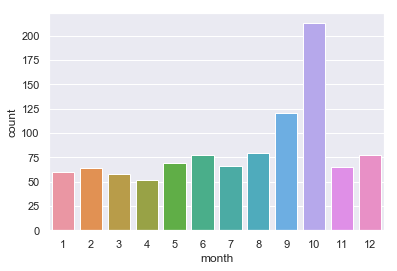

In [146]:
print('Given these results October is likely the best month to make contact with clients.')
sns.countplot(x="month", data=df);

In [65]:
print('Number of clients in Data:',len(df['Client Name'].unique()))

Number of clients in Data: 35


In [66]:
for month in range(1,13):
    mask = df['month'] == month
    print(month, len(df[mask]['Client Name'].unique())/35)
# Given the results of this code it seems like October is still the answer.

1 0.8571428571428571
2 0.8857142857142857
3 0.8285714285714286
4 0.7428571428571429
5 0.9428571428571428
6 0.9714285714285714
7 0.8
8 0.9428571428571428
9 0.9428571428571428
10 1.0
11 0.8571428571428571
12 0.9142857142857143


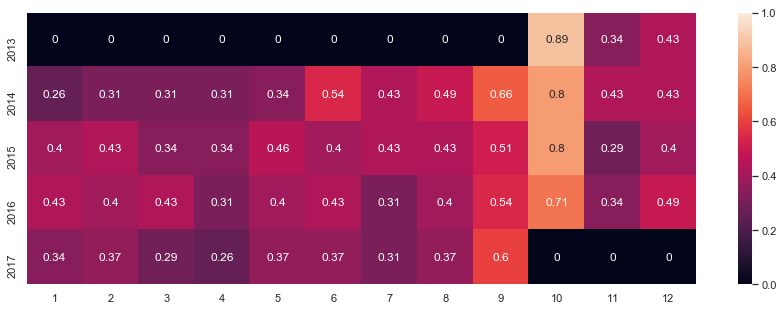

In [125]:
# However, I wasn't 100% confident in my answer yet, so I decided to break it down for each year.
list_for_df = []
for year in range(2013, 2018):
    year_dict = {}
    for month in range(1,13):
        mask_y = df['year']  == year
        df_y   = df[mask_y]
        mask   = df_y['month'] == month# & df['year'] == year
        clients_contacted = len(df_y[mask]['Client Name'].unique())
        year_dict[month] = round(clients_contacted/35,2)
    list_for_df.append(year_dict)
    
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(pd.DataFrame(list_for_df, index = range(2013, 2018)), annot=True, vmax = 1);


## Answer:
Even after breaking it down to each year, October remains the year which consistently received both the most and the highest percentage of contacts for each year.  As such the company should contact their clients in October.

# Other Insights & Analysis

While all of the managers are performing well, Milean Crona is currently in the lead for contacting the most clients


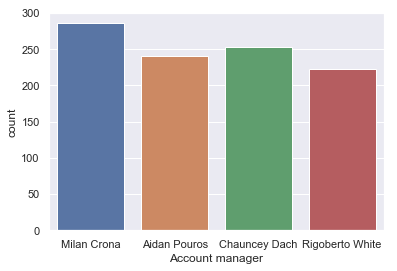

In [152]:
print('While all of the managers are performing well, Milean Crona is currently in the lead for contacting the most clients')
sns.countplot(x="Account manager", data=df);

In [155]:
# Incase you're wondering about the exact numeric counts, they are as follows:
df['Account manager'].value_counts()

Milan Crona        286
Chauncey Dach      253
Aidan Pouros       240
Rigoberto White    222
Name: Account manager, dtype: int64


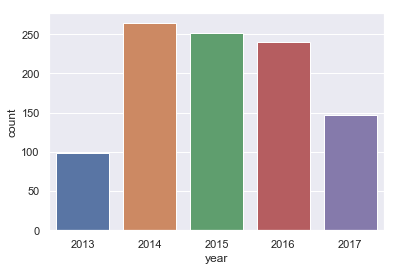

In [153]:
# Counts of contact per year.
# It must be noted that the data starts on October 2013 and ends November 2017.
# This is why those two years are so much less underperforming in this graph.
sns.countplot(x="year", data=df);

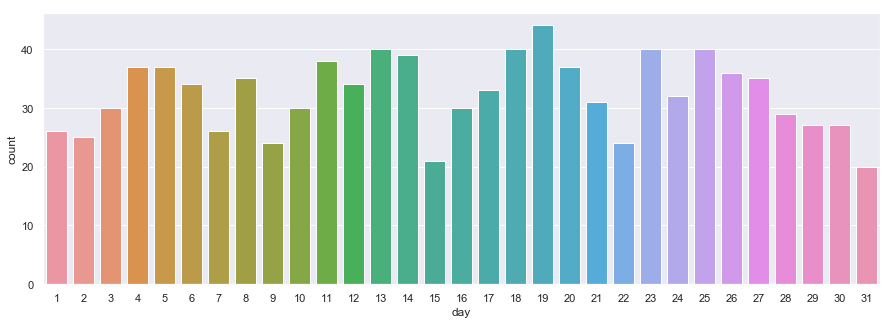

In [156]:
# Incase one wondered how the breakdown of contacts happened per day of the month, here you go!
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x="day", data=df);

### Some final thoughts
Concern: The data starts on October and ends on a September.  There is the possibility that might be correlated to the answer and thus potentially a biased and false answer.

OR it's that the company launched in October and they celebrate their company birthday every year and THAT is the thing that is correlated to the high client contact rate.

After thinking about this issue further I've decided that if there is an error, then I am unlikely to have enough information at the current moment.  If I were working at this company I would contact those with more information about the CRM system and potentially the managers themselves to see if I can rule out the possibility that the data is skewed in such a way to give a false answer.

# Laboritory!
 - The place for all the code and thoughts that I'm currently working on.  
 - This is to help keep the rest of the notebook clean.

In [137]:
# This was just a quick check to see if they've all been working 
# during each year and barring a late start in 2013 or early leave 
# in 2017 they all seem to have worked about the same time.
for year in range(2013, 2018):
    mask = df['year'] == year
    print(set([i for i in df[mask]['Account manager'].unique()]))

{'Milan Crona', 'Chauncey Dach', 'Rigoberto White', 'Aidan Pouros'}
{'Milan Crona', 'Chauncey Dach', 'Rigoberto White', 'Aidan Pouros'}
{'Milan Crona', 'Chauncey Dach', 'Rigoberto White', 'Aidan Pouros'}
{'Milan Crona', 'Chauncey Dach', 'Rigoberto White', 'Aidan Pouros'}
{'Milan Crona', 'Chauncey Dach', 'Rigoberto White', 'Aidan Pouros'}


## Code Recycling Bin
- For when I'm not 100% sure that I want to delete some code, but I also want it out of the way.

In [49]:
# Percent of clients each year
for year in years:
    print('----------')
    print(year)
    mask = df['year'] == year
    print(len(df[mask]['Client Name'].unique())/35)
# This shows that all clients were contacted each year that's on reccord.

----------
2015
1.0
----------
2013
1.0
----------
2016
1.0
----------
2014
1.0
----------
2017
1.0


In [7]:
df['month'].value_counts()
# Original code to see which was the best performing month w/o percentages

10    213
09    121
08     79
06     77
12     77
05     69
07     66
11     65
02     64
01     60
03     58
04     52
Name: month, dtype: int64

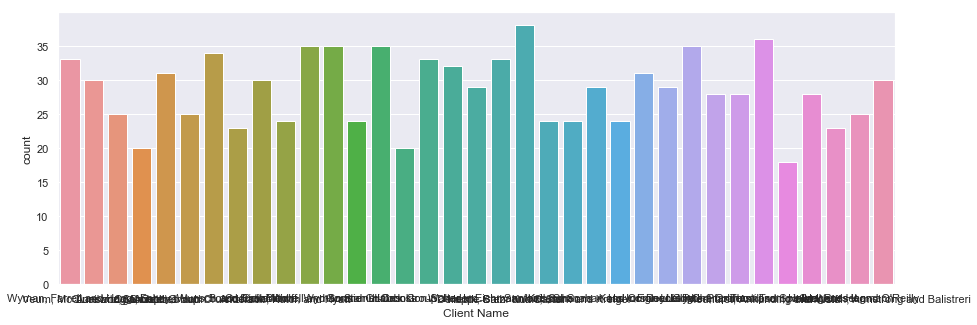

In [140]:
# At this current time it would not be a good use of 
# my energy/time to clean up this chart, but I will be leaving it in.
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x="Client Name", data=df);

Below is the original code I used to make sure that October wasn't just a one time thing and that it was indeed yearly achieving more contacts than the other months.  I've kept it here, but commented out the print statements.  Incase anybody wants to see that.

In [139]:
# However, I wasn't 100% confident in my answer yet, so I decided to break it down for each year.
for year in range(2013, 2018):
    #print('-------')
    #print(year)
    for month in range(1,13):
        mask_y = df['year']  == year
        df_y   = df[mask_y]
        mask   = df_y['month'] == month# & df['year'] == year
        clients_contacted = len(df_y[mask]['Client Name'].unique())
        #print(month, round(clients_contacted/35,2))